<center><span style="font-size: 25pt">Homework 3</span></center>
<center><span style="font-size: 18pt">Capucine Hustin</span></center>

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

AMZN= yf.Ticker("AMZN")

AMZN_historical = AMZN.history(start="2016-01-01", end="2020-12-31", interval="1d")

NCLH= yf.Ticker("NCLH")

NCLH_historical = NCLH.history(start="2016-01-01", end="2020-12-31", interval="1d")

<span style="font-size: 25pt">Question 1</span>

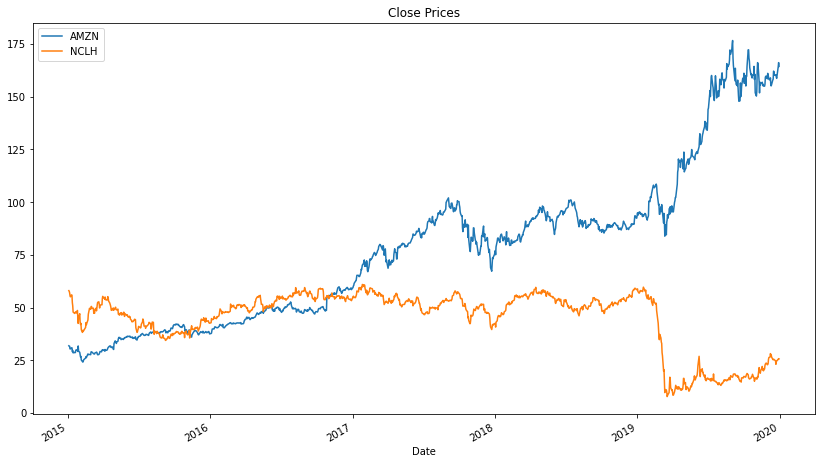

In [2]:
# Plot the close prices
plt.figure(figsize=(14, 8))
AMZN_historical.Close.plot(label='AMZN')
NCLH_historical.Close.plot(label='NCLH')
plt.title('Close Prices')
plt.legend()
plt.show()

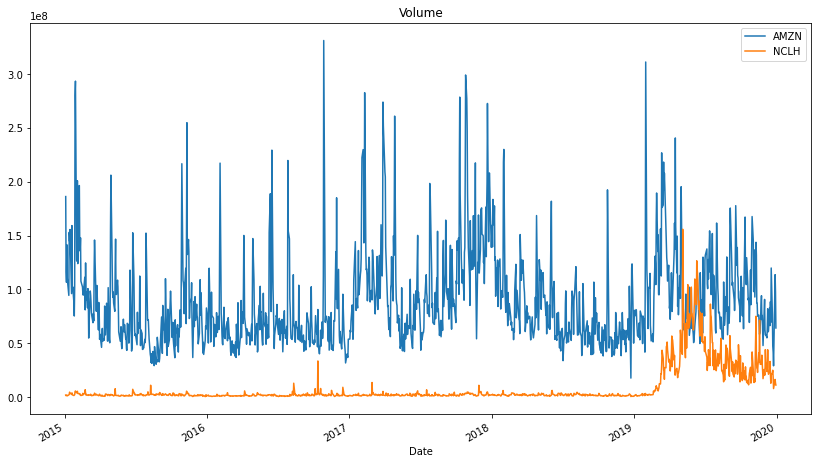

In [3]:
# Plot the stock volumes 
plt.figure(figsize=(14, 8))
AMZN_historical.Volume.plot(label='AMZN')
NCLH_historical.Volume.plot(label='NCLH')
plt.title('Volume')
plt.legend()
plt.show()

<u><span style="font-size: 16pt">Observation of the data patterns</span></u>

We can see that the close prices and Volume is quite stable from 2016 to 2020. 
In 2020, there is a shift, notably due to Covid. The Close Price of NCLH droped in 2020, probably because during Covid airplaines stayed mainly on the ground.

<u><span style="font-size: 16pt">What kind of properties should a model have in order to
be able to predict stock volumes and close prices well? </span></u>

A model, in order to be able to predict stock volumes and close prices well, have to use the precedent values (volume and price) in order to predict the future ones.

<u><span style="font-size: 16pt">Comment on the distributional shift
observations in 2020 - how would you enhance your models for 2020 to improve performance?</span></u>

In 2020, there is a huge distributional shift in prices. AMZN close prices went up while NCLH close prices went down. The stock volumes of NCLH also has an important increase in 2020. This is due to the Covid crisis. People sold their NCLH stocks as aerospace companies weren't fully working. Amazon close price went up probably because people ordered more online during the Covid crisis (some countries were doing a lockdown, people feared catching the Covid if they go out).

To improve the performance of my model for 2020, we can give a weighting to the recent values, so that the values of 2020 at day n is mainly predicted by the values of day n-1,...,1 of 2020, and will follow the trend. 

<span style="font-size: 25pt">Question 2</span>

In [4]:
#Predictions AMZN 
N_values=[10,30,60]

for N in N_values:
    AMZN_historical['Volume mean N='+str(N)]=AMZN_historical['Volume'].rolling(window=N).mean().shift(1)
    AMZN_historical['Volume median N='+str(N)]=AMZN_historical['Volume'].rolling(window=N).median().shift(1)

pred_AMZN_2019_data = {'AMZN real data': AMZN_historical[AMZN_historical.index.year == 2019]['Volume']}
for N in N_values:
    pred_AMZN_2019_data[f'AMZN mean N={N}'] = AMZN_historical['Volume mean N='+str(N)][AMZN_historical.index.year == 2019]
    pred_AMZN_2019_data[f'AMZN median N={N}'] = AMZN_historical['Volume median N='+str(N)][AMZN_historical.index.year == 2019]

pred_AMZN_2020_data = {'AMZN real data': AMZN_historical[AMZN_historical.index.year == 2020]['Volume']}
for N in N_values:
    pred_AMZN_2020_data[f'AMZN mean N={N}'] = AMZN_historical['Volume mean N='+str(N)][AMZN_historical.index.year == 2020]
    pred_AMZN_2020_data[f'AMZN median N={N}'] = AMZN_historical['Volume median N='+str(N)][AMZN_historical.index.year == 2020]

pred_AMZN_2019=pd.DataFrame(pred_AMZN_2019_data)
pred_AMZN_2020=pd.DataFrame(pred_AMZN_2020_data)

print('Amazon 2019')
display(pred_AMZN_2019)
print('Amazon 2020')
display(pred_AMZN_2020)


Amazon 2019


,AMZN real data,AMZN mean N=10,AMZN median N=10,AMZN mean N=30,AMZN median N=30,AMZN mean N=60,AMZN median N=60
Date,,,,,,,
2019-01-02 00:00:00-05:00,159662000,181828800.0,176588000.0,1.528493e+08,147148000.0,1.544031e+08,138829000.0
2019-01-03 00:00:00-05:00,139512000,180135400.0,176212000.0,1.525531e+08,147148000.0,1.546451e+08,138829000.0
2019-01-04 00:00:00-05:00,183652000,181040600.0,176212000.0,1.531595e+08,147148000.0,1.546962e+08,139100000.0
2019-01-07 00:00:00-05:00,159864000,181821400.0,180116000.0,1.540879e+08,147148000.0,1.552927e+08,139100000.0
2019-01-08 00:00:00-05:00,177628000,177824200.0,168222000.0,1.521641e+08,147148000.0,1.563661e+08,139311000.0
...,...,...,...,...,...,...,...
2019-12-24 00:00:00-05:00,17626000,61069000.0,58416000.0,5.781287e+07,56138000.0,5.799217e+07,54158000.0
2019-12-26 00:00:00-05:00,120108000,57803000.0,58416000.0,5.710307e+07,56138000.0,5.740437e+07,54158000.0
2019-12-27 00:00:00-05:00,123732000,65618600.0,62411000.0,5.974827e+07,56633000.0,5.837800e+07,54158000.0


Amazon 2020


,AMZN real data,AMZN mean N=10,AMZN median N=10,AMZN mean N=30,AMZN median N=30,AMZN mean N=60,AMZN median N=60
Date,,,,,,,
2020-01-02 00:00:00-05:00,80580000,72380600.0,69958000.0,6.187220e+07,56633000.0,5.942020e+07,54158000.0
2020-01-03 00:00:00-05:00,75288000,73149800.0,70261000.0,6.266520e+07,58494000.0,6.004497e+07,55091000.0
2020-01-06 00:00:00-05:00,81236000,73975800.0,74391000.0,6.366093e+07,61215000.0,6.045243e+07,55353000.0
2020-01-07 00:00:00-05:00,80898000,76793800.0,77934000.0,6.450880e+07,62133000.0,6.112520e+07,55531000.0
2020-01-08 00:00:00-05:00,70160000,74582000.0,77934000.0,6.543013e+07,62626000.0,6.161510e+07,55712000.0
...,...,...,...,...,...,...,...
2020-12-23 00:00:00-05:00,41876000,75549600.0,73111000.0,7.431567e+07,70764000.0,9.090427e+07,86714000.0
2020-12-24 00:00:00-05:00,29038000,71535600.0,67938000.0,7.131753e+07,69190000.0,9.043693e+07,86714000.0
2020-12-28 00:00:00-05:00,113736000,68379000.0,67938000.0,6.937420e+07,68191000.0,8.928887e+07,86004000.0


In [5]:
# Predictions NCLH

for N in N_values:
    NCLH_historical['Volume mean N=' + str(N)] = NCLH_historical['Volume'].rolling(window=N).mean().shift(1)
    NCLH_historical['Volume median N=' + str(N)] = NCLH_historical['Volume'].rolling(window=N).median().shift(1)

pred_NCLH_2019_data = {'NCLH real data': NCLH_historical[NCLH_historical.index.year == 2019]['Volume']}
for N in N_values:
    pred_NCLH_2019_data[f'NCLH mean N={N}'] = NCLH_historical['Volume mean N=' + str(N)][NCLH_historical.index.year == 2019]
    pred_NCLH_2019_data[f'NCLH median N={N}'] = NCLH_historical['Volume median N=' + str(N)][NCLH_historical.index.year == 2019]

pred_NCLH_2020_data = {'NCLH real data': NCLH_historical[NCLH_historical.index.year == 2020]['Volume']}
for N in N_values:
    pred_NCLH_2020_data[f'NCLH mean N={N}'] = NCLH_historical['Volume mean N=' + str(N)][NCLH_historical.index.year == 2020]
    pred_NCLH_2020_data[f'NCLH median N={N}'] = NCLH_historical['Volume median N=' + str(N)][NCLH_historical.index.year == 2020]

pred_NCLH_2019 = pd.DataFrame(pred_NCLH_2019_data)
pred_NCLH_2020 = pd.DataFrame(pred_NCLH_2020_data)

print('NCLH 2019')
display(pred_NCLH_2019)
print('NCLH 2020')
display(pred_NCLH_2020)


NCLH 2019


,NCLH real data,NCLH mean N=10,NCLH median N=10,NCLH mean N=30,NCLH median N=30,NCLH mean N=60,NCLH median N=60
Date,,,,,,,
2019-01-02 00:00:00-05:00,1917400,2655820.0,2199100.0,2.599290e+06,1948650.0,2.712678e+06,2345000.0
2019-01-03 00:00:00-05:00,2654500,2668660.0,2199100.0,2.596633e+06,1908800.0,2.711612e+06,2345000.0
2019-01-04 00:00:00-05:00,2318700,2697570.0,2199100.0,2.636967e+06,2018650.0,2.731267e+06,2426900.0
2019-01-07 00:00:00-05:00,1519500,2546090.0,2199100.0,2.636770e+06,2018650.0,2.745297e+06,2426900.0
2019-01-08 00:00:00-05:00,2224900,2235300.0,2018650.0,2.616540e+06,1908800.0,2.757452e+06,2426900.0
...,...,...,...,...,...,...,...
2019-12-24 00:00:00-05:00,497100,1616940.0,1469250.0,1.527990e+06,1420550.0,1.582517e+06,1374900.0
2019-12-26 00:00:00-05:00,909400,1575970.0,1469250.0,1.508690e+06,1420550.0,1.571742e+06,1374900.0
2019-12-27 00:00:00-05:00,842600,1541890.0,1469250.0,1.482513e+06,1356800.0,1.566082e+06,1374900.0


NCLH 2020


,NCLH real data,NCLH mean N=10,NCLH median N=10,NCLH mean N=30,NCLH median N=30,NCLH mean N=60,NCLH median N=60
Date,,,,,,,
2020-01-02 00:00:00-05:00,977700,1388250.0,1205450.0,1.420240e+06,1253550.0,1.471528e+06,1308650.0
2020-01-03 00:00:00-05:00,1611800,1338990.0,959150.0,1.411430e+06,1253550.0,1.468245e+06,1308650.0
2020-01-06 00:00:00-05:00,2302500,1340770.0,959150.0,1.401393e+06,1253550.0,1.471608e+06,1308650.0
2020-01-07 00:00:00-05:00,1623100,1363840.0,959150.0,1.404940e+06,1253550.0,1.488198e+06,1336850.0
2020-01-08 00:00:00-05:00,1187300,1228670.0,959150.0,1.350063e+06,1253550.0,1.495953e+06,1364850.0
...,...,...,...,...,...,...,...
2020-12-23 00:00:00-05:00,18389600,24952890.0,23529200.0,2.957037e+07,26650600.0,2.589544e+07,23319500.0
2020-12-24 00:00:00-05:00,7884200,22397560.0,21932950.0,2.892190e+07,26031600.0,2.596709e+07,23319500.0
2020-12-28 00:00:00-05:00,16371400,20729040.0,21226200.0,2.828892e+07,25269400.0,2.545870e+07,22742800.0


In [6]:
#Average mean square error

#Amazon:


MSE_AMZN_2019_data={}
MSE_AMZN_2020_data={}

for N in N_values:
    MSE_AMZN_2019_mean_N=[]
    MSE_AMZN_2019_median_N=[]
    MSE_AMZN_2020_mean_N=[]
    MSE_AMZN_2020_median_N=[]
    for i in range (12):
        MSE_AMZN_2019_mean_N.append(((pred_AMZN_2019['AMZN real data'][pred_AMZN_2019.index.month==i+1]-pred_AMZN_2019['AMZN mean N='+str(N)][pred_AMZN_2019.index.month==i+1])**2).mean())
        MSE_AMZN_2019_median_N.append(((pred_AMZN_2019['AMZN real data'][pred_AMZN_2019.index.month==i+1]-pred_AMZN_2019['AMZN median N='+str(N)][pred_AMZN_2019.index.month==i+1])**2).mean())
        MSE_AMZN_2020_mean_N.append(((pred_AMZN_2020['AMZN real data'][pred_AMZN_2020.index.month==i+1]-pred_AMZN_2020['AMZN mean N='+str(N)][pred_AMZN_2020.index.month==i+1])**2).mean())
        MSE_AMZN_2020_median_N.append(((pred_AMZN_2020['AMZN real data'][pred_AMZN_2020.index.month==i+1]-pred_AMZN_2020['AMZN median N='+str(N)][pred_AMZN_2020.index.month==i+1])**2).mean())
    MSE_AMZN_2019_data['AMZN 2019 mean N='+str(N)]=MSE_AMZN_2019_mean_N
    MSE_AMZN_2019_data['AMZN 2019 median N='+str(N)]=MSE_AMZN_2019_median_N
    MSE_AMZN_2020_data['AMZN 2020 mean N='+str(N)]=MSE_AMZN_2020_mean_N
    MSE_AMZN_2020_data['AMZN 2020 median N='+str(N)]=MSE_AMZN_2020_median_N

MSE_AMZN_2019=pd.DataFrame(MSE_AMZN_2019_data)

MSE_AMZN_2020=pd.DataFrame(MSE_AMZN_2020_data)

new_index = {0: 'January', 1: 'Febuary', 2: 'March', 3:'April', 4:'May', 5:'June', 6:'July', 7:'August', 8:'September', 9:'October', 10:'November', 11:'December'}
MSE_AMZN_2019=MSE_AMZN_2019.rename(index=new_index)
MSE_AMZN_2020=MSE_AMZN_2020.rename(index=new_index)

print('Mean Square Error for Amazon 2019')
display(MSE_AMZN_2019)
print('Mean Square Error for Amazon 2020')
display(MSE_AMZN_2020)

Mean Square Error for Amazon 2019


,AMZN 2019 mean N=10,AMZN 2019 median N=10,AMZN 2019 mean N=30,AMZN 2019 median N=30,AMZN 2019 mean N=60,AMZN 2019 median N=60
January,1.398339e+15,1.415904e+15,1.754497e+15,1.404242e+15,1.736004e+15,1.310638e+15
Febuary,1.463459e+15,1.089475e+15,2.263488e+15,1.679801e+15,3.764543e+15,3.156286e+15
March,8.948773e+14,1.127330e+15,7.472978e+14,9.032678e+14,1.034104e+15,8.342791e+14
April,7.839448e+14,8.897451e+14,7.530745e+14,6.798493e+14,9.436016e+14,8.238395e+14
May,3.640572e+14,4.788569e+14,4.827545e+14,6.124245e+14,4.268272e+14,5.798197e+14
June,1.008963e+15,9.143272e+14,1.053861e+15,1.019937e+15,1.030106e+15,9.583497e+14
July,3.917544e+14,4.344214e+14,4.002146e+14,3.814469e+14,5.070186e+14,4.307607e+14
August,5.349744e+14,5.169379e+14,6.151882e+14,7.240887e+14,4.603121e+14,4.512525e+14
September,3.375045e+14,3.835029e+14,4.155380e+14,3.386514e+14,3.287852e+14,3.003360e+14
October,1.054902e+15,1.045355e+15,9.613415e+14,1.000068e+15,9.805041e+14,9.368231e+14


Mean Square Error for Amazon 2020


,AMZN 2020 mean N=10,AMZN 2020 median N=10,AMZN 2020 mean N=30,AMZN 2020 median N=30,AMZN 2020 mean N=60,AMZN 2020 median N=60
January,3.133476e+15,3.186578e+15,3.077776e+15,3.117503e+15,3.309363e+15,3.519391e+15
Febuary,1.935913e+15,2.345397e+15,1.472040e+15,2.061037e+15,1.914337e+15,2.468486e+15
March,2.033296e+15,2.062094e+15,2.802580e+15,3.568748e+15,4.493188e+15,6.283010e+15
April,2.457723e+15,2.579543e+15,2.271154e+15,2.058025e+15,1.702175e+15,1.829406e+15
May,1.096732e+15,9.031775e+14,1.594051e+15,1.084221e+15,2.526428e+15,1.721477e+15
June,6.431731e+14,7.186198e+14,6.247258e+14,6.643846e+14,1.284170e+15,8.538944e+14
July,1.066500e+15,1.117574e+15,1.392588e+15,1.558475e+15,1.224676e+15,1.651994e+15
August,5.144839e+14,4.318284e+14,8.903458e+14,9.169147e+14,5.152309e+14,3.823228e+14
September,1.162191e+15,1.400650e+15,1.437290e+15,1.817605e+15,1.141694e+15,1.407423e+15
October,8.277727e+14,8.175539e+14,6.835826e+14,7.055196e+14,7.684839e+14,8.836434e+14


In [7]:
#Mean Square Error

# NCLH:
MSE_NCLH_2019_data = {}
MSE_NCLH_2020_data = {}

for N in N_values:
    MSE_NCLH_2019_mean_N = []
    MSE_NCLH_2019_median_N = []
    MSE_NCLH_2020_mean_N = []
    MSE_NCLH_2020_median_N = []
    for i in range(12):
        MSE_NCLH_2019_mean_N.append(((pred_NCLH_2019['NCLH real data'][pred_NCLH_2019.index.month == i + 1] - pred_NCLH_2019[f'NCLH mean N={N}'][pred_NCLH_2019.index.month == i + 1]) ** 2).mean())
        MSE_NCLH_2019_median_N.append(((pred_NCLH_2019['NCLH real data'][pred_NCLH_2019.index.month == i + 1] - pred_NCLH_2019[f'NCLH median N={N}'][pred_NCLH_2019.index.month == i + 1]) ** 2).mean())
        MSE_NCLH_2020_mean_N.append(((pred_NCLH_2020['NCLH real data'][pred_NCLH_2020.index.month == i + 1] - pred_NCLH_2020[f'NCLH mean N={N}'][pred_NCLH_2020.index.month == i + 1]) ** 2).mean())
        MSE_NCLH_2020_median_N.append(((pred_NCLH_2020['NCLH real data'][pred_NCLH_2020.index.month == i + 1] - pred_NCLH_2020[f'NCLH median N={N}'][pred_NCLH_2020.index.month == i + 1]) ** 2).mean())
    MSE_NCLH_2019_data[f'NCLH 2019 mean N={N}'] = MSE_NCLH_2019_mean_N
    MSE_NCLH_2019_data[f'NCLH 2019 median N={N}'] = MSE_NCLH_2019_median_N
    MSE_NCLH_2020_data[f'NCLH 2020 mean N={N}'] = MSE_NCLH_2020_mean_N
    MSE_NCLH_2020_data[f'NCLH 2020 median N={N}'] = MSE_NCLH_2020_median_N

MSE_NCLH_2019 = pd.DataFrame(MSE_NCLH_2019_data)
MSE_NCLH_2020 = pd.DataFrame(MSE_NCLH_2020_data)

new_index = {0: 'January', 1: 'Febuary', 2: 'March', 3: 'April', 4: 'May', 5: 'June', 6: 'July', 7: 'August', 8: 'September', 9: 'October', 10: 'November', 11: 'December'}
MSE_NCLH_2019 = MSE_NCLH_2019.rename(index=new_index)
MSE_NCLH_2020 = MSE_NCLH_2020.rename(index=new_index)

print('Mean Square Error for NCLH 2019')
display(MSE_NCLH_2019)
print('Mean Square Error for NCLH 2020')
display(MSE_NCLH_2020)



Mean Square Error for NCLH 2019


,NCLH 2019 mean N=10,NCLH 2019 median N=10,NCLH 2019 mean N=30,NCLH 2019 median N=30,NCLH 2019 mean N=60,NCLH 2019 median N=60
January,1.320832e+12,1.419126e+12,1.481348e+12,1.350585e+12,1.565146e+12,1.354128e+12
Febuary,1.321896e+12,1.113822e+12,8.826179e+11,1.036458e+12,8.958979e+11,9.866530e+11
March,4.791488e+11,6.237327e+11,3.270661e+11,2.919890e+11,3.080285e+11,3.129696e+11
April,4.246934e+11,4.078681e+11,4.559244e+11,3.790440e+11,4.399306e+11,2.888548e+11
May,7.549525e+11,8.510751e+11,8.221035e+11,8.440916e+11,7.430071e+11,7.374388e+11
June,3.094992e+12,3.280254e+12,2.421785e+12,2.892423e+12,2.437364e+12,2.800652e+12
July,7.095648e+11,7.291416e+11,6.782323e+11,7.232114e+11,6.155146e+11,6.825545e+11
August,1.061622e+12,1.131300e+12,9.730543e+11,9.167784e+11,1.001048e+12,1.272543e+12
September,1.793102e+11,1.725782e+11,3.992905e+11,2.676487e+11,4.620653e+11,2.796902e+11
October,5.390818e+11,4.899398e+11,4.948218e+11,4.742809e+11,7.141511e+11,5.091903e+11


Mean Square Error for NCLH 2020


,NCLH 2020 mean N=10,NCLH 2020 median N=10,NCLH 2020 mean N=30,NCLH 2020 median N=30,NCLH 2020 mean N=60,NCLH 2020 median N=60
January,4.775651e+11,6.725661e+11,5.729903e+11,6.598024e+11,5.298415e+11,6.373449e+11
Febuary,6.179316e+12,7.923546e+12,9.672588e+12,1.102364e+13,1.194837e+13,1.339737e+13
March,1.436865e+14,1.860160e+14,4.064976e+14,5.565250e+14,5.893784e+14,7.851318e+14
April,2.141424e+14,2.170722e+14,2.235046e+14,2.385122e+14,4.626908e+14,6.861043e+14
May,1.388668e+15,1.550215e+15,1.696761e+15,2.117288e+15,2.560378e+15,2.933891e+15
June,5.922037e+14,5.815166e+14,6.922395e+14,7.116009e+14,1.206011e+15,1.617134e+15
July,4.296687e+14,4.498953e+14,8.275792e+14,7.642864e+14,8.498673e+14,7.294265e+14
August,1.459849e+14,1.589039e+14,1.756152e+14,1.283227e+14,7.285013e+14,5.063157e+14
September,1.288679e+14,1.364585e+14,1.223060e+14,1.219683e+14,2.303070e+14,1.641418e+14
October,6.992347e+13,6.506137e+13,9.219151e+13,6.869172e+13,1.489103e+14,1.088822e+14


In [8]:
#MSE for banking holidays for AMZN: 

##For 2019
#Columbus Day: 14 october
#Veteran's Day: 11 november
#Friday after Thanksgiving: 29 november
#31st December

##For 2020:
#Columbus Day: 12 october
#Veteran's Day: 11 november
#Friday after Thanksgiving: 27 november
#31st December 

date_banking_holiday = ["2019-10-14", "2019-11-11", "2019-11-29", "2019-12-31","2020-10-12", "2020-11-11", "2020-11-27"]

pred_AMZN = pd.concat([pred_AMZN_2019, pred_AMZN_2020])

pred_AMZN_hol = pred_AMZN.loc[date_banking_holiday]

MSE_AMZN_hol_mean=[((pred_AMZN_hol['AMZN real data']-pred_AMZN_hol['AMZN mean N=10'])**2).mean(),((pred_AMZN_hol['AMZN real data']-pred_AMZN_hol['AMZN mean N=30'])**2).mean(),((pred_AMZN_hol['AMZN real data']-pred_AMZN_hol['AMZN mean N=60'])**2).mean()]
MSE_AMZN_hol_median=[((pred_AMZN_hol['AMZN real data']-pred_AMZN_hol['AMZN median N=10'])**2).mean(),((pred_AMZN_hol['AMZN real data']-pred_AMZN_hol['AMZN median N=30'])**2).mean(),((pred_AMZN_hol['AMZN real data']-pred_AMZN_hol['AMZN median N=60'])**2).mean()]

pred_AMZN_ordinary_days=pred_AMZN.drop(date_banking_holiday)

MSE_AMZN_ord_mean=[((pred_AMZN_ordinary_days['AMZN real data']-pred_AMZN_ordinary_days['AMZN mean N=10'])**2).mean(),((pred_AMZN_ordinary_days['AMZN real data']-pred_AMZN_ordinary_days['AMZN mean N=30'])**2).mean(),((pred_AMZN_ordinary_days['AMZN real data']-pred_AMZN_ordinary_days['AMZN mean N=60'])**2).mean()]
MSE_AMZN_ord_median=[((pred_AMZN_ordinary_days['AMZN real data']-pred_AMZN_ordinary_days['AMZN median N=10'])**2).mean(),((pred_AMZN_ordinary_days['AMZN real data']-pred_AMZN_ordinary_days['AMZN median N=30'])**2).mean(),((pred_AMZN_ordinary_days['AMZN real data']-pred_AMZN_ordinary_days['AMZN median N=60'])**2).mean()]


MSE_AMZN_hol_data={'AMZN banking holiday mean':MSE_AMZN_hol_mean,
                        'AMZN banking holiday median':MSE_AMZN_hol_median,
                        'AMZN ordinary day mean':MSE_AMZN_ord_mean,
                        'AMZN ordinary day median':MSE_AMZN_ord_median}

MSE_AMZN_hol=pd.DataFrame(MSE_AMZN_hol_data)
new_index = {0: 'N=10', 1: 'N=30', 2: 'N=60'}
MSE_AMZN_hol = MSE_AMZN_hol.rename(index=new_index)

print('Mean Square Error:')
MSE_AMZN_hol



Mean Square Error:


,AMZN banking holiday mean,AMZN banking holiday median,AMZN ordinary day mean,AMZN ordinary day median
N=10,1.397096e+15,1.336797e+15,1.046660e+15,1.076456e+15
N=30,1.231593e+15,1.117492e+15,1.172835e+15,1.191648e+15
N=60,1.462022e+15,1.368969e+15,1.365994e+15,1.389966e+15


In [9]:
#MSE for banking holidays for NCLH: 

pred_NCLH = pd.concat([pred_NCLH_2019, pred_NCLH_2020])

pred_NCLH_hol = pred_NCLH.loc[date_banking_holiday]

MSE_NCLH_hol_mean=[((pred_NCLH_hol['NCLH real data']-pred_NCLH_hol['NCLH mean N=10'])**2).mean(),((pred_NCLH_hol['NCLH real data']-pred_NCLH_hol['NCLH mean N=30'])**2).mean(),((pred_NCLH_hol['NCLH real data']-pred_NCLH_hol['NCLH mean N=60'])**2).mean()]
MSE_NCLH_hol_median=[((pred_NCLH_hol['NCLH real data']-pred_NCLH_hol['NCLH median N=10'])**2).mean(),((pred_NCLH_hol['NCLH real data']-pred_NCLH_hol['NCLH median N=30'])**2).mean(),((pred_NCLH_hol['NCLH real data']-pred_NCLH_hol['NCLH median N=60'])**2).mean()]

pred_NCLH_ordinary_days=pred_NCLH.drop(date_banking_holiday)

MSE_NCLH_ord_mean=[((pred_NCLH_ordinary_days['NCLH real data']-pred_NCLH_ordinary_days['NCLH mean N=10'])**2).mean(),((pred_NCLH_ordinary_days['NCLH real data']-pred_NCLH_ordinary_days['NCLH mean N=30'])**2).mean(),((pred_NCLH_ordinary_days['NCLH real data']-pred_NCLH_ordinary_days['NCLH mean N=60'])**2).mean()]
MSE_NCLH_ord_median=[((pred_NCLH_ordinary_days['NCLH real data']-pred_NCLH_ordinary_days['NCLH median N=10'])**2).mean(),((pred_NCLH_ordinary_days['NCLH real data']-pred_NCLH_ordinary_days['NCLH median N=30'])**2).mean(),((pred_NCLH_ordinary_days['NCLH real data']-pred_NCLH_ordinary_days['NCLH median N=60'])**2).mean()]

MSE_NCLH_hol_data={'NCLH banking holiday mean':MSE_NCLH_hol_mean,
                        'NCLH banking holiday median':MSE_NCLH_hol_median,
                        'NCLH ordinary day mean':MSE_NCLH_ord_mean,
                        'NCLH ordinary day median':MSE_NCLH_ord_median}

MSE_NCLH_hol=pd.DataFrame(MSE_NCLH_hol_data)
new_index = {0: 'N=10', 1: 'N=30', 2: 'N=60'}
MSE_NCLH_hol = MSE_NCLH_hol.rename(index=new_index)

print('Mean Square Error:')
MSE_NCLH_hol


Mean Square Error:


,NCLH banking holiday mean,NCLH banking holiday median,NCLH ordinary day mean,NCLH ordinary day median
N=10,6.003452e+13,3.887914e+13,1.461954e+14,1.571322e+14
N=30,3.829779e+13,2.888630e+13,1.984526e+14,2.191656e+14
N=60,4.904910e+13,3.420856e+13,3.024844e+14,3.362340e+14


<u><span style="font-size: 16pt">Do you observe any patterns which N works best?</span></u>

N works better for small N, as when N=10 has lower mean squared errors than N=30 which has lower mean squared errors than N=60. 

<u><span style="font-size: 16pt">Can you comment why?</span></u>

A small N works better because it catches better the current trend of the assets. Taking a large N would only smooth the patterns and the current curve will be absorb by the previous data.

<u><span style="font-size: 16pt">Do you see any difference across different stocks?</span></u>

We can see that the mean square error increased for most of 2020. The Covid shock created abrupt curve that are difficult to follow, which explains why the MSE is larger. Moreover, the stock volumes increased during the Covid crisis and when numbers are getting larger, even if the forcasted value is close to the real one in term of percentage, the mean square error will still be huge because it calculates the difference and not the ratio.

This is also the reason why the mean squared errors are larger for the AMZN stock volumes. AMZN stock volumes are larger than those of NCLH and the difference with the forcast is then higher (but probably not the ratio).

The mean squared error for banking holiday for AMZN is generally smaller than the one for the ordinary days but for NCLH it is the contrary. This is surprising as the forecasting of the banking holiday days are mainly done with ordinary days that are not supposed to fit well banking holiday days. Ordinary days are forecasted mainly with previous ordinary days so the forcasting should fit more. Maybe as the Covid era takes nearly a half of the data it distorts the results. 

<span style="font-size: 25pt">Question 3</span>

In [10]:
#linear regression 
import numpy as np
from sklearn.linear_model import LinearRegression

print('Coefficients A, B, C in linear autoregressive models of lag 1 and lag 2 for AMAZON')

AMZN_historical['Volume day+1']=AMZN_historical['Volume'].shift(-1)
AMZN_historical['Volume day-1']=AMZN_historical['Volume'].shift(1)
AMZN_historical['Volume day-2']=AMZN_historical['Volume'].shift(2)

AMZN_2019_2020=pd.concat([AMZN_historical[AMZN_historical.index.year==2019], AMZN_historical[AMZN_historical.index.year==2020]])
AMZN_2019_2020=AMZN_2019_2020.drop(AMZN_2019_2020.index[-1])

A_lag1=[]
B_lag1=[]
A_lag2=[]
B_lag2=[]
C_lag2=[]
A_lag1_0=[]
B_lag1_0=[]
A_lag2_0=[]
B_lag2_0=[]
C_lag2_0=[]

for N in N_values:
    AMZN_2018_last_Ndays_0=AMZN_historical[AMZN_historical.index.year==2018].tail(N+1)
    model = LinearRegression()
    X=AMZN_2018_last_Ndays_0['Volume'][0:N].values.reshape(-1, 1)
    y= AMZN_2018_last_Ndays_0['Volume day+1'][0:N].values
    model.fit(X, y)
    A_lag1_0.append(model.coef_[0])
    B_lag1_0.append(model.intercept_)
    AMZN_2018_last_Ndays=AMZN_historical[AMZN_historical.index.year==2018].tail(N)
    AMZN_2019_2020_N=pd.concat([AMZN_2018_last_Ndays, AMZN_2019_2020])
    model = LinearRegression()
    X = AMZN_2018_last_Ndays_0[['Volume', 'Volume day-1']][0:N].to_numpy()
    y= AMZN_2018_last_Ndays_0['Volume day+1'][0:N].values
    model.fit(X, y)
    A_lag2_0.append(model.coef_[0])
    B_lag2_0.append(model.coef_[1])
    C_lag2_0.append(model.intercept_)
    A_N_l1=[]
    B_N_l1=[]
    A_N_l2=[]
    B_N_l2=[]
    C_N_l2=[]
    for day in range(len(AMZN_2019_2020_N)):
        model = LinearRegression()
        X=AMZN_2019_2020_N['Volume'][day:day+N].values.reshape(-1, 1)
        y= AMZN_2019_2020_N['Volume day+1'][day:day+N].values
        model.fit(X, y)
        A_N_l1.append(model.coef_[0])
        B_N_l1.append(model.intercept_)

        model = LinearRegression()
        X = AMZN_2019_2020_N[['Volume', 'Volume day-1']][day:day+N].to_numpy()
        y= AMZN_2019_2020_N['Volume day+1'][day:day+N].values
        model.fit(X, y)
        A_N_l2.append(model.coef_[0])
        B_N_l2.append(model.coef_[1])
        C_N_l2.append(model.intercept_)
    A_N_l1=A_N_l1[:-N]
    B_N_l1=B_N_l1[:-N]
    A_N_l2=A_N_l2[:-N]
    B_N_l2=B_N_l2[:-N]
    C_N_l2=C_N_l2[:-N]

    A_lag1.append(A_N_l1)
    B_lag1.append(B_N_l1)
    A_lag2.append(A_N_l2)
    B_lag2.append(B_N_l2)
    C_lag2.append(C_N_l2)

forecast_AMZN=[]
for i in range(3):
    forecast_data={'A lag1':A_lag1[i],
                   'B lag1':B_lag1[i],
                   'A lag2':A_lag2[i],
                   'B lag2':B_lag2[i],
                   'C lag2':C_lag2[i]}
    forecast_N=pd.DataFrame(forecast_data)
    forecast_N=forecast_N.shift(1)
    line_1={'A lag1':A_lag1_0[i],'B lag1':B_lag1_0[i],'A lag2':A_lag2_0[i],'B lag2':B_lag2_0[i],'C lag2':C_lag2_0[i]}
    forecast_N.iloc[0] = line_1
    forecast_N=forecast_N.set_index(AMZN_2019_2020.index)
    forecast_AMZN.append(forecast_N)
    print('AMZN coefficients for N='+str(N_values[i]))
    display(forecast_N)

Coefficients A, B, C in linear autoregressive models of lag 1 and lag 2 for AMAZON
AMZN coefficients for N=10


,A lag1,B lag1,A lag2,B lag2,C lag2
Date,,,,,
2019-01-02 00:00:00-05:00,-0.091314,1.983250e+08,-0.108153,0.119532,1.806237e+08
2019-01-03 00:00:00-05:00,-0.055033,1.901420e+08,-0.043360,0.119113,1.665012e+08
2019-01-04 00:00:00-05:00,-0.012141,1.832276e+08,-0.008466,0.068664,1.700806e+08
2019-01-07 00:00:00-05:00,-0.037521,1.886142e+08,-0.036723,0.062251,1.772562e+08
2019-01-08 00:00:00-05:00,-0.033087,1.838401e+08,-0.026077,0.186504,1.488007e+08
...,...,...,...,...,...
2020-12-22 00:00:00-05:00,-0.100234,8.492228e+07,-0.086721,0.783330,2.981835e+07
2020-12-23 00:00:00-05:00,-0.200852,9.109224e+07,-0.224100,-0.200146,1.079447e+08
2020-12-24 00:00:00-05:00,0.122922,6.224886e+07,0.102641,-0.126868,7.359861e+07


AMZN coefficients for N=30


,A lag1,B lag1,A lag2,B lag2,C lag2
Date,,,,,
2019-01-02 00:00:00-05:00,0.283098,1.096662e+08,0.275509,0.024897,1.070742e+08
2019-01-03 00:00:00-05:00,0.290404,1.081651e+08,0.277789,0.044260,1.033420e+08
2019-01-04 00:00:00-05:00,0.299741,1.074330e+08,0.291502,0.028256,1.043711e+08
2019-01-07 00:00:00-05:00,0.297960,1.084525e+08,0.288718,0.030327,1.052415e+08
2019-01-08 00:00:00-05:00,0.293851,1.068852e+08,0.271138,0.077625,9.849609e+07
...,...,...,...,...,...
2020-12-22 00:00:00-05:00,0.435139,4.355834e+07,0.310131,0.261414,3.294510e+07
2020-12-23 00:00:00-05:00,0.371405,4.552075e+07,0.382589,-0.025291,4.662819e+07
2020-12-24 00:00:00-05:00,0.205115,5.607431e+07,0.201207,0.007689,5.576857e+07


AMZN coefficients for N=60


,A lag1,B lag1,A lag2,B lag2,C lag2
Date,,,,,
2019-01-02 00:00:00-05:00,0.524514,7.371397e+07,0.579233,-0.100999,8.071815e+07
2019-01-03 00:00:00-05:00,0.528646,7.302060e+07,0.578520,-0.093695,7.973345e+07
2019-01-04 00:00:00-05:00,0.527171,7.317181e+07,0.578825,-0.097670,8.026421e+07
2019-01-07 00:00:00-05:00,0.523689,7.428003e+07,0.572734,-0.092969,8.107022e+07
2019-01-08 00:00:00-05:00,0.518813,7.579818e+07,0.569330,-0.096971,8.295427e+07
...,...,...,...,...,...
2020-12-22 00:00:00-05:00,0.544530,4.154446e+07,0.441481,0.185984,3.396140e+07
2020-12-23 00:00:00-05:00,0.556309,3.998943e+07,0.478342,0.143884,3.391928e+07
2020-12-24 00:00:00-05:00,0.576434,3.803666e+07,0.501943,0.139407,3.204926e+07


In [11]:
# Linear regression

print('Coefficients A, B, C in linear autoregressive models of lag 1 and lag 2 for NCLH')

NCLH_historical['Volume day+1'] = NCLH_historical['Volume'].shift(-1)
NCLH_historical['Volume day-1'] = NCLH_historical['Volume'].shift(1)
NCLH_historical['Volume day-2'] = NCLH_historical['Volume'].shift(2)

NCLH_2019_2020 = pd.concat([NCLH_historical[NCLH_historical.index.year == 2019], NCLH_historical[NCLH_historical.index.year == 2020]])
NCLH_2019_2020 = NCLH_2019_2020.drop(NCLH_2019_2020.index[-1])

A_lag1 = []
B_lag1 = []
A_lag2 = []
B_lag2 = []
C_lag2 = []
A_lag1_0 = []
B_lag1_0 = []
A_lag2_0 = []
B_lag2_0 = []
C_lag2_0 = []

for N in N_values:
    NCLH_2018_last_Ndays_0 = NCLH_historical[NCLH_historical.index.year == 2018].tail(N + 1)
    model = LinearRegression()
    X = NCLH_2018_last_Ndays_0['Volume'][0:N].values.reshape(-1, 1)
    y = NCLH_2018_last_Ndays_0['Volume day+1'][0:N].values
    model.fit(X, y)
    A_lag1_0.append(model.coef_[0])
    B_lag1_0.append(model.intercept_)
    NCLH_2018_last_Ndays = NCLH_historical[NCLH_historical.index.year == 2018].tail(N)
    NCLH_2019_2020_N = pd.concat([NCLH_2018_last_Ndays, NCLH_2019_2020])
    model = LinearRegression()
    X = NCLH_2018_last_Ndays_0[['Volume', 'Volume day-1']][0:N].to_numpy()
    y = NCLH_2018_last_Ndays_0['Volume day+1'][0:N].values
    model.fit(X, y)
    A_lag2_0.append(model.coef_[0])
    B_lag2_0.append(model.coef_[1])
    C_lag2_0.append(model.intercept_)
    A_N_l1 = []
    B_N_l1 = []
    A_N_l2 = []
    B_N_l2 = []
    C_N_l2 = []
    for day in range(len(NCLH_2019_2020_N)):
        model = LinearRegression()
        X = NCLH_2019_2020_N['Volume'][day:day + N].values.reshape(-1, 1)
        y = NCLH_2019_2020_N['Volume day+1'][day:day + N].values
        model.fit(X, y)
        A_N_l1.append(model.coef_[0])
        B_N_l1.append(model.intercept_)

        model = LinearRegression()
        X = NCLH_2019_2020_N[['Volume', 'Volume day-1']][day:day + N].to_numpy()
        y = NCLH_2019_2020_N['Volume day+1'][day:day + N].values
        model.fit(X, y)
        A_N_l2.append(model.coef_[0])
        B_N_l2.append(model.coef_[1])
        C_N_l2.append(model.intercept_)
    A_N_l1 = A_N_l1[:-N]
    B_N_l1 = B_N_l1[:-N]
    A_N_l2 = A_N_l2[:-N]
    B_N_l2 = B_N_l2[:-N]
    C_N_l2 = C_N_l2[:-N]

    A_lag1.append(A_N_l1)
    B_lag1.append(B_N_l1)
    A_lag2.append(A_N_l2)
    B_lag2.append(B_N_l2)
    C_lag2.append(C_N_l2)

forecast_NCLH = []
for i in range(3):
    forecast_data = {'A lag1': A_lag1[i],
                     'B lag1': B_lag1[i],
                     'A lag2': A_lag2[i],
                     'B lag2': B_lag2[i],
                     'C lag2': C_lag2[i]}
    forecast_N = pd.DataFrame(forecast_data)
    forecast_N = forecast_N.shift(1)
    line_1 = {'A lag1': A_lag1_0[i], 'B lag1': B_lag1_0[i], 'A lag2': A_lag2_0[i], 'B lag2': B_lag2_0[i], 'C lag2': C_lag2_0[i]}
    forecast_N.iloc[0] = line_1
    forecast_N = forecast_N.set_index(NCLH_2019_2020.index)
    forecast_NCLH.append(forecast_N)
    print('NCLH coefficients for N=' + str(N_values[i]))
    display(forecast_N)


Coefficients A, B, C in linear autoregressive models of lag 1 and lag 2 for NCLH
NCLH coefficients for N=10


,A lag1,B lag1,A lag2,B lag2,C lag2
Date,,,,,
2019-01-02 00:00:00-05:00,0.405999,1.588911e+06,0.480765,-0.168789,1.829551e+06
2019-01-03 00:00:00-05:00,0.395026,1.619542e+06,0.472808,-0.186867,1.904027e+06
2019-01-04 00:00:00-05:00,0.382988,1.675504e+06,0.460307,-0.192957,1.981627e+06
2019-01-07 00:00:00-05:00,0.413073,1.431796e+06,0.449586,-0.094677,1.585961e+06
2019-01-08 00:00:00-05:00,0.268453,1.551796e+06,0.258099,0.022663,1.517023e+06
...,...,...,...,...,...
2020-12-22 00:00:00-05:00,0.180973,2.063018e+07,0.220113,-0.278277,2.703627e+07
2020-12-23 00:00:00-05:00,0.186230,2.025726e+07,0.245301,-0.328936,2.709960e+07
2020-12-24 00:00:00-05:00,0.110709,1.963506e+07,0.155809,-0.239919,2.455903e+07


NCLH coefficients for N=30


,A lag1,B lag1,A lag2,B lag2,C lag2
Date,,,,,
2019-01-02 00:00:00-05:00,0.297729,1.820150e+06,0.281623,0.054789,1.715993e+06
2019-01-03 00:00:00-05:00,0.300261,1.816167e+06,0.281632,0.062701,1.700504e+06
2019-01-04 00:00:00-05:00,0.293548,1.874730e+06,0.274304,0.064148,1.757960e+06
2019-01-07 00:00:00-05:00,0.293771,1.862107e+06,0.274108,0.066170,1.742136e+06
2019-01-08 00:00:00-05:00,0.295512,1.837342e+06,0.277505,0.061297,1.723183e+06
...,...,...,...,...,...
2020-12-22 00:00:00-05:00,0.055684,2.951878e+07,0.064732,-0.113020,3.272571e+07
2020-12-23 00:00:00-05:00,0.203237,2.322071e+07,0.203674,-0.007548,2.344074e+07
2020-12-24 00:00:00-05:00,0.224074,2.229595e+07,0.223616,0.001457,2.226395e+07


NCLH coefficients for N=60


,A lag1,B lag1,A lag2,B lag2,C lag2
Date,,,,,
2019-01-02 00:00:00-05:00,0.375660,1.700394e+06,0.339026,0.093326,1.548900e+06
2019-01-03 00:00:00-05:00,0.376797,1.689482e+06,0.339947,0.096429,1.529598e+06
2019-01-04 00:00:00-05:00,0.370436,1.726789e+06,0.337989,0.086173,1.581014e+06
2019-01-07 00:00:00-05:00,0.363457,1.752599e+06,0.331033,0.086566,1.606424e+06
2019-01-08 00:00:00-05:00,0.352974,1.788434e+06,0.324903,0.076448,1.656698e+06
...,...,...,...,...,...
2020-12-22 00:00:00-05:00,0.201518,2.064364e+07,0.188574,0.067418,1.920267e+07
2020-12-23 00:00:00-05:00,0.205384,2.056304e+07,0.191240,0.066533,1.917400e+07
2020-12-24 00:00:00-05:00,0.210465,2.051702e+07,0.188913,0.104839,1.835318e+07


In [12]:
#Linear Regression prediction:

for i in range(3):
    AMZN_2019_2020['pred lag1 N=' + str(N_values[i])]=forecast_AMZN[i]['A lag1']*AMZN_2019_2020['Volume day-1']+forecast_AMZN[i]['B lag1']
    AMZN_2019_2020['pred lag2 N=' + str(N_values[i])]=forecast_AMZN[i]['A lag2']*AMZN_2019_2020['Volume day-1']+forecast_AMZN[i]['B lag2']*AMZN_2019_2020['Volume day-2']+forecast_AMZN[i]['C lag2']
    NCLH_2019_2020['pred lag1 N=' + str(N_values[i])]=forecast_NCLH[i]['A lag1']*NCLH_2019_2020['Volume day-1']+forecast_NCLH[i]['B lag1']
    NCLH_2019_2020['pred lag2 N=' + str(N_values[i])]=forecast_NCLH[i]['A lag2']*NCLH_2019_2020['Volume day-1']+forecast_NCLH[i]['B lag2']*NCLH_2019_2020['Volume day-2']+forecast_NCLH[i]['C lag2']


In [13]:
# AMZN MSE per month:
AMZN_2019=AMZN_2019_2020[AMZN_2019_2020.index.year==2019]
AMZN_2020=AMZN_2019_2020[AMZN_2019_2020.index.year==2020]
MSE_2019_month_data={}
MSE_2020_month_data={}
for j in range(2):
    for N in N_values:
        MSE_2019_N=[]
        MSE_2020_N=[]
        for i in range(12):
            MSE_2019_N.append(((AMZN_2019[AMZN_2019.index.month==i+1]['Volume']-AMZN_2019[AMZN_2019.index.month==i+1]['pred lag'+str(j+1)+ ' N=' + str(N)])**2).mean())
            MSE_2020_N.append(((AMZN_2020['Volume'][AMZN_2020.index.month==i+1]-AMZN_2020['pred lag'+str(j+1)+ ' N=' + str(N)][AMZN_2020.index.month==i+1])**2).mean())
        MSE_2019_month_data['lag'+str(j+1)+' N='+str(N)]=MSE_2019_N
        MSE_2020_month_data['lag'+str(j+1)+' N='+str(N)]=MSE_2020_N

MSE_AMZN_2019_month=pd.DataFrame(MSE_2019_month_data)
new_index = {0: 'January', 1: 'Febuary', 2: 'March', 3:'April', 4:'May', 5:'June', 6:'July', 7:'August', 8:'September', 9:'October', 10:'November', 11:'December'}
MSE_AMZN_2019_month = MSE_AMZN_2019_month.rename(index=new_index)

MSE_AMZN_2020_month=pd.DataFrame(MSE_2020_month_data)
MSE_AMZN_2020_month = MSE_AMZN_2020_month.rename(index=new_index)

print('MSE Linear Regression AMZN 2019 per month')
display(MSE_AMZN_2019_month)
print('MSE Linear Regression AMZN 2020 per month')
display(MSE_AMZN_2020_month)

MSE Linear Regression AMZN 2019 per month


,lag1 N=10,lag1 N=30,lag1 N=60,lag2 N=10,lag2 N=30,lag2 N=60
January,1.290896e+15,1.163071e+15,1.038127e+15,1.214279e+15,1.151909e+15,1.081846e+15
Febuary,1.771656e+15,1.193496e+15,1.456667e+15,2.513114e+15,1.597750e+15,1.459483e+15
March,1.017665e+15,7.128565e+14,6.747880e+14,1.253223e+15,7.086729e+14,6.397950e+14
April,1.293373e+15,6.287631e+14,5.942261e+14,1.936985e+15,6.986975e+14,5.981437e+14
May,3.537841e+14,3.520082e+14,3.306482e+14,3.697610e+14,3.900025e+14,3.276189e+14
June,9.838508e+14,7.616595e+14,7.405087e+14,1.209294e+15,7.684498e+14,7.922764e+14
July,4.224220e+14,2.835505e+14,2.931018e+14,4.738370e+14,2.892710e+14,2.946576e+14
August,3.716261e+14,3.703297e+14,3.116896e+14,4.765763e+14,3.850637e+14,3.148480e+14
September,5.349901e+14,3.926381e+14,4.335093e+14,6.602502e+14,3.922194e+14,4.408835e+14
October,3.887433e+15,1.067683e+15,9.622153e+14,5.003217e+15,1.147038e+15,1.062723e+15


MSE Linear Regression AMZN 2020 per month


,lag1 N=10,lag1 N=30,lag1 N=60,lag2 N=10,lag2 N=30,lag2 N=60
January,4.571175e+15,3.146964e+15,3.089838e+15,3.635375e+15,2.728930e+15,2.921381e+15
Febuary,1.844409e+16,2.028801e+15,2.140286e+15,4.642607e+16,4.964087e+15,3.368585e+15
March,1.624400e+15,1.343450e+15,1.609786e+15,1.688183e+15,1.431148e+15,1.687778e+15
April,2.244108e+15,1.775933e+15,1.597982e+15,3.441518e+15,1.783055e+15,1.586960e+15
May,8.363074e+14,8.446869e+14,8.925748e+14,1.005450e+15,9.851833e+14,9.921848e+14
June,7.031933e+14,5.039411e+14,6.382611e+14,9.014629e+14,4.893144e+14,6.028950e+14
July,1.211053e+15,1.004488e+15,8.846114e+14,1.309415e+15,1.032237e+15,9.446953e+14
August,4.772646e+14,5.854132e+14,4.413538e+14,6.478733e+14,6.385980e+14,4.519518e+14
September,1.165345e+15,9.393995e+14,8.105109e+14,1.157574e+15,9.411945e+14,8.381613e+14
October,8.169016e+14,6.786460e+14,6.940819e+14,1.113733e+15,7.004629e+14,7.205668e+14


In [14]:
# NCLH MSE per month:
# MSE per month:

NCLH_2019 = NCLH_2019_2020[NCLH_2019_2020.index.year == 2019]
NCLH_2020 = NCLH_2019_2020[NCLH_2019_2020.index.year == 2020]
MSE_2019_month_data = {}
MSE_2020_month_data = {}
for j in range(2):
    for N in N_values:
        MSE_2019_N = []
        MSE_2020_N = []
        for i in range(12):
            MSE_2019_N.append(((NCLH_2019[NCLH_2019.index.month == i + 1]['Volume'] - NCLH_2019[NCLH_2019.index.month == i + 1]['pred lag'+str(j + 1)+' N='+str(N)])**2).mean())
            MSE_2020_N.append(((NCLH_2020['Volume'][NCLH_2020.index.month == i + 1] - NCLH_2020['pred lag'+str(j+1)+' N='+str(N)][NCLH_2020.index.month == i + 1])**2).mean())
        MSE_2019_month_data['lag'+str(j+1)+' N='+str(N)] = MSE_2019_N
        MSE_2020_month_data['lag'+str(j+1)+' N='+str(N)] = MSE_2020_N

MSE_NCLH_2019_month = pd.DataFrame(MSE_2019_month_data)

MSE_NCLH_2019_month = MSE_NCLH_2019_month.rename(index=new_index)

MSE_NCLH_2020_month = pd.DataFrame(MSE_2020_month_data)
MSE_NCLH_2020_month = MSE_NCLH_2020_month.rename(index=new_index)

print('MSE Linear Regression NCLH 2019 per month')
display(MSE_NCLH_2019_month)
print('MSE Linear Regression NCLH 2020 per month')
display(MSE_NCLH_2020_month)


MSE Linear Regression NCLH 2019 per month


,lag1 N=10,lag1 N=30,lag1 N=60,lag2 N=10,lag2 N=30,lag2 N=60
January,1.669515e+12,1.057784e+12,1.025307e+12,2.286091e+12,1.068536e+12,9.872743e+11
Febuary,5.771501e+11,3.982043e+11,5.096843e+11,1.315621e+12,4.031302e+11,5.251624e+11
March,4.732203e+11,4.809592e+11,4.136219e+11,5.428095e+11,4.587531e+11,4.109894e+11
April,5.293818e+11,3.155289e+11,3.200491e+11,6.192864e+11,3.435800e+11,3.184848e+11
May,6.525160e+11,6.020897e+11,5.677249e+11,8.088766e+11,6.331873e+11,5.908603e+11
June,2.196625e+12,1.782240e+12,1.809848e+12,3.197624e+12,1.589531e+12,1.789069e+12
July,7.238781e+11,6.208678e+11,5.850251e+11,5.637763e+11,5.635346e+11,4.650666e+11
August,6.346883e+11,6.711699e+11,5.765719e+11,6.789692e+11,8.041008e+11,6.687452e+11
September,1.861911e+11,3.179648e+11,3.002066e+11,1.943368e+11,3.549069e+11,3.671437e+11
October,7.370084e+11,4.555493e+11,4.149800e+11,7.165477e+11,4.677424e+11,4.086183e+11


MSE Linear Regression NCLH 2020 per month


,lag1 N=10,lag1 N=30,lag1 N=60,lag2 N=10,lag2 N=30,lag2 N=60
January,8.119380e+11,5.447045e+11,5.006701e+11,1.137076e+12,6.296487e+11,5.302975e+11
Febuary,1.955977e+12,2.314420e+12,2.301190e+12,2.016110e+12,2.044945e+12,2.176659e+12
March,8.096171e+13,7.563074e+13,7.524617e+13,1.226148e+14,1.021743e+14,9.900053e+13
April,3.063745e+14,1.716173e+14,1.748513e+14,3.084954e+14,1.760937e+14,1.725300e+14
May,1.123046e+15,1.088417e+15,1.191492e+15,1.303588e+15,1.212325e+15,1.264501e+15
June,3.919918e+14,3.768464e+14,3.390508e+14,4.381341e+14,3.823487e+14,3.250684e+14
July,3.724979e+14,2.905948e+14,3.152996e+14,4.500428e+14,2.748933e+14,3.054124e+14
August,1.616436e+14,1.311861e+14,1.679475e+14,1.917904e+14,1.345083e+14,1.485328e+14
September,1.308263e+14,1.237143e+14,1.614359e+14,1.246709e+14,1.168886e+14,1.717683e+14
October,7.935078e+13,8.591523e+13,1.044327e+14,1.043463e+14,1.025992e+14,1.019284e+14


In [15]:
#MSE Banking Holidays AMZN:

pred_lag_AMZN_hol = AMZN_2019_2020.loc[date_banking_holiday]
pred_AMZN_lag_ordinary_days=AMZN_2019_2020.drop(date_banking_holiday)
MSE_AMZN_lag1_hol=[]
MSE_AMZN_lag1_ord=[]
MSE_AMZN_lag2_hol=[]
MSE_AMZN_lag2_ord=[]
for i in range(3):
    MSE_AMZN_lag1_hol.append(((pred_lag_AMZN_hol['Volume']-pred_lag_AMZN_hol['pred lag1 N='+ str(N_values[i])])**2).mean())
    MSE_AMZN_lag1_ord.append(((pred_AMZN_lag_ordinary_days['Volume']-pred_AMZN_lag_ordinary_days['pred lag1 N='+ str(N_values[i])])**2).mean())
    MSE_AMZN_lag2_hol.append(((pred_lag_AMZN_hol['Volume']-pred_lag_AMZN_hol['pred lag2 N='+ str(N_values[i])])**2).mean())
    MSE_AMZN_lag2_ord.append(((pred_AMZN_lag_ordinary_days['Volume']-pred_AMZN_lag_ordinary_days['pred lag2 N='+ str(N_values[i])])**2).mean())

MSE_AMZN_hol_data={'AMZN lag1 banking holiday':MSE_AMZN_lag1_hol,
                   'AMZN lag1 ordinary day':MSE_AMZN_lag1_ord,
                   'AMZN lag2 banking holiday':MSE_AMZN_lag2_hol,
                   'AMZN lag2 ordinary day':MSE_AMZN_lag2_ord}

MSE_AMZN_hol=pd.DataFrame(MSE_AMZN_hol_data)
new_index = {0: 'N=10', 1: 'N=30', 2: 'N=60'}
MSE_AMZN_hol = MSE_AMZN_hol.rename(index=new_index)

print('Mean Square Error with Linear Regression Forecasting')
MSE_AMZN_hol

Mean Square Error with Linear Regression Forecasting


,AMZN lag1 banking holiday,AMZN lag1 ordinary day,AMZN lag2 banking holiday,AMZN lag2 ordinary day
N=10,1.449279e+15,1.884573e+15,1.190945e+15,3.186007e+15
N=30,1.128516e+15,9.104370e+14,9.186690e+14,1.052687e+15
N=60,1.317902e+15,8.942647e+14,1.189981e+15,9.530314e+14


In [16]:
#MSE Banking Holidays NCLH:

pred_lag_NCLH_hol = NCLH_2019_2020.loc[date_banking_holiday]
pred_NCLH_lag_ordinary_days = NCLH_2019_2020.drop(date_banking_holiday)
MSE_NCLH_lag1_hol = []
MSE_NCLH_lag1_ord = []
MSE_NCLH_lag2_hol = []
MSE_NCLH_lag2_ord = []
for i in range(3):
    MSE_NCLH_lag1_hol.append(((pred_lag_NCLH_hol['Volume'] - pred_lag_NCLH_hol['pred lag1 N=' + str(N_values[i])]) ** 2).mean())
    MSE_NCLH_lag1_ord.append(((pred_NCLH_lag_ordinary_days['Volume'] - pred_NCLH_lag_ordinary_days['pred lag1 N=' + str(N_values[i])]) ** 2).mean())
    MSE_NCLH_lag2_hol.append(((pred_lag_NCLH_hol['Volume'] - pred_lag_NCLH_hol['pred lag2 N=' + str(N_values[i])]) ** 2).mean())
    MSE_NCLH_lag2_ord.append(((pred_NCLH_lag_ordinary_days['Volume'] - pred_NCLH_lag_ordinary_days['pred lag2 N=' + str(N_values[i])]) ** 2).mean())

MSE_NCLH_hol_data = {'NCLH lag1 banking holiday': MSE_NCLH_lag1_hol,
                     'NCLH lag1 ordinary day': MSE_NCLH_lag1_ord,
                     'NCLH lag2 banking holiday': MSE_NCLH_lag2_hol,
                     'NCLH lag2 ordinary day': MSE_NCLH_lag2_ord}

MSE_NCLH_hol = pd.DataFrame(MSE_NCLH_hol_data)
new_index = {0: 'N=10', 1: 'N=30', 2: 'N=60'}
MSE_NCLH_hol = MSE_NCLH_hol.rename(index=new_index)

print('Mean Square Error with Linear Regression Forecasting')
MSE_NCLH_hol


Mean Square Error with Linear Regression Forecasting


,NCLH lag1 banking holiday,NCLH lag1 ordinary day,NCLH lag2 banking holiday,NCLH lag2 ordinary day
N=10,6.075358e+13,1.291734e+14,1.004090e+14,1.480576e+14
N=30,3.791601e+13,1.166064e+14,5.199969e+13,1.230978e+14
N=60,3.900875e+13,1.206458e+14,3.560801e+13,1.231756e+14


<u><span style="font-size: 16pt">Do you think models of higher lag would be necessary? Why? </span></u>

I don't think a model with higher lag would be interesting as the MSE is larger for the lag2 model than the lag1. Futhermore, A_lag1 and A_lag2 are quite similar as well as B_lag1 and C_lag2, and B_lag2 is quite small. This shows that lag1 is quite accurate and we don't need a lag2. 

<u><span style="font-size: 16pt">Do you observe any patterns which N works best? </span></u>

Now it fits better for N large. This is probably because we try to create a linear model based on N points and if N is small we tend to overfit. 

<u><span style="font-size: 16pt">Do you see any difference across different stocks?</span></u>

Once again wee can see that the mean square error increased for most of 2020 (we already explained the possible reasons at question 2). AMZN forecasting stock volumes mean squared errors are still larger than the ones from NCLH.

The mean squared error for banking holiday and ordinary days are a little bit similar for AMZN, and the MSE for banking holidays are smaller than the ordinary days. This is still surprising as we would have expected the MSE of banking holdiays to be larger. 

<center><span style="font-size: 25pt">Question 4</span></center>

In [17]:
#generate training and testing data


#size of the training: 1month
AMZN_X_train=AMZN_historical['Volume']['2018-03':'2018-04'].to_numpy()
AMZN_y_train=(AMZN_historical['Volume'].shift(-1))['2018-03':'2018-04'].to_numpy()


#size if the test: 1 month
AMZN_X_test=AMZN_historical['Volume']['2018-05'].to_numpy()
AMZN_y_test=(AMZN_historical['Volume'].shift(-1))['2018-05'].to_numpy()


In [18]:
import torch
from torch.utils.data import Dataset, DataLoader

# Convert data to torch tensors
class Data(Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X.astype(np.float32))
        self.y = torch.from_numpy(y.astype(np.float32))
        self.len = self.X.shape[0]
       
    def __getitem__(self, index):
        return self.X[index].unsqueeze(0), self.y[index]
   
    def __len__(self):
        return self.len
   
batch_size = 64

# Instantiate training and test data
train_data = Data(AMZN_X_train, AMZN_y_train)
train_dataloader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)
test_data = Data(AMZN_X_test, AMZN_y_test)
test_dataloader = DataLoader(dataset=test_data, batch_size=batch_size,shuffle=True)


# Check it's working
for batch, (X, y) in enumerate(train_dataloader):
    print(f"Batch: {batch+1}")
    print(f"X shape: {X.shape}")
    print(f"y shape: {y.shape}")
    break

Batch: 1
X shape: torch.Size([42, 1])
y shape: torch.Size([42])


In [19]:
#creating the NN model - pay attention at the activation function
from torch import nn
from torch import optim

input_dim = 1
hidden_dim = 5
output_dim = 1

class NeuralNetwork(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(NeuralNetwork, self).__init__()
        self.layer_1 = nn.Linear(input_dim, hidden_dim)
        nn.init.kaiming_uniform_(self.layer_1.weight, nonlinearity="relu")
        self.layer_2 = nn.Linear(hidden_dim, output_dim)
       
    def forward(self, x):
        x = torch.nn.functional.relu(self.layer_1(x))
        x = torch.nn.functional.relu(self.layer_2(x))

        return x
       
model = NeuralNetwork(input_dim, hidden_dim, output_dim)
print(model)

NeuralNetwork(
  (layer_1): Linear(in_features=1, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)


In [20]:
#choosing the optimizer and the learning rate
learning_rate = 0.005

loss_fn = nn.MSELoss()
#stochastic gradient descent
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

[7364456942141440.0, 7154418008981504.0, 6946572730368000.0, 6741076798865408.0, 6538086980780032.0, 6337758968676352.0, 6140254360698880.0, 5945732070637568.0, 5754352086024192.0, 5566274931261440.0, 5381660057010176.0, 5200666913931264.0, 5023453342072832.0, 4850173960257536.0, 4680980702953472.0, 4516024967757824.0, 4355449562333184.0, 4199394878423040.0, 4047994060013568.0, 3901375687688192.0, 3759657336176640.0, 3622950406193152.0, 3491355561033728.0, 3364963800317952.0, 3243852433457152.0, 3128087764008960.0, 3017723479064576.0, 2912795817410560.0, 2813329475108864.0, 2719329552433152.0, 2630786385707008.0, 2547672862949376.0, 2469941739520000.0, 2397529127780352.0, 2330352349609984.0, 2268309936406528.0, 2211281763303424.0, 2159129586040832.0, 2111697577836544.0, 2068812463603712.0, 2030286070087680.0, 1995915325865984.0, 1965483603525632.0, 1938763404017664.0, 1915517027745792.0, 1895500601098240.0, 1878463673794560.0, 1864154856030208.0, 1852320878952448.0, 1842710486974464.0,

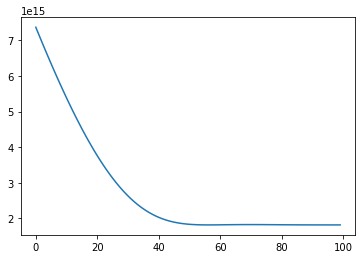

In [21]:
#train the model
num_epochs = 100
loss_values = []


for epoch in range(num_epochs):
    for X, y in train_dataloader:
        # zero the parameter gradients
        optimizer.zero_grad()
       
        # forward + backward + optimize
        pred = model(X)
        loss = loss_fn(pred, y.unsqueeze(-1))
        loss_values.append(loss.item())
        loss.backward()
        optimizer.step()

print(loss_values)
plt.plot(loss_values)
plt.show()

This is the loss function on the training data set for AMZN according to the different epochs



In [22]:
test_data = Data(AMZN_X_test, AMZN_y_test)
test_dataloader = DataLoader(dataset=test_data, batch_size=batch_size,shuffle=True)

for X,y in test_dataloader:
    pred=model(X)
    loss = loss_fn(model(X), y.unsqueeze(-1))

print('MSE testing data set AMZN=',loss)
    

MSE testing data set AMZN= tensor(3.6697e+14, grad_fn=<MseLossBackward>)


<u><span style="font-size: 28pt">For NCLH </span></u>

In [23]:
#generate training and testing data


#size of the training: 1month
NCLH_X_train=NCLH_historical['Volume']['2018-03':'2018-04'].to_numpy()
NCLH_y_train=(NCLH_historical['Volume'].shift(-1))['2018-03':'2018-04'].to_numpy()


#size if the test: 1 month
NCLH_X_test=NCLH_historical['Volume']['2018-05'].to_numpy()
NCLH_y_test=(NCLH_historical['Volume'].shift(-1))['2018-05'].to_numpy()


In [24]:

# Convert data to torch tensors
class Data(Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X.astype(np.float32))
        self.y = torch.from_numpy(y.astype(np.float32))
        self.len = self.X.shape[0]
       
    def __getitem__(self, index):
        return self.X[index].unsqueeze(0), self.y[index]
   
    def __len__(self):
        return self.len
   
batch_size = 64

# Instantiate training and test data
train_data = Data(NCLH_X_train, NCLH_y_train)
train_dataloader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)
test_data = Data(NCLH_X_test, NCLH_y_test)
test_dataloader = DataLoader(dataset=test_data, batch_size=batch_size,shuffle=True)


# Check it's working
for batch, (X, y) in enumerate(train_dataloader):
    print(f"Batch: {batch+1}")
    print(f"X shape: {X.shape}")
    print(f"y shape: {y.shape}")
    break

Batch: 1
X shape: torch.Size([42, 1])
y shape: torch.Size([42])


In [25]:
#creating the NN model - pay attention at the activation function
from torch import nn
from torch import optim

input_dim = 1
hidden_dim = 5
output_dim = 1

class NeuralNetwork(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(NeuralNetwork, self).__init__()
        self.layer_1 = nn.Linear(input_dim, hidden_dim)
        nn.init.kaiming_uniform_(self.layer_1.weight, nonlinearity="relu")
        self.layer_2 = nn.Linear(hidden_dim, output_dim)
       
    def forward(self, x):
        x = torch.nn.functional.relu(self.layer_1(x))
        x = torch.nn.functional.relu(self.layer_2(x))

        return x
       
model = NeuralNetwork(input_dim, hidden_dim, output_dim)
print(model)

NeuralNetwork(
  (layer_1): Linear(in_features=1, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)


In [26]:
#choosing the optimizer and the learning rate
learning_rate = 0.005

loss_fn = nn.MSELoss()
#stochastic gradient descent
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

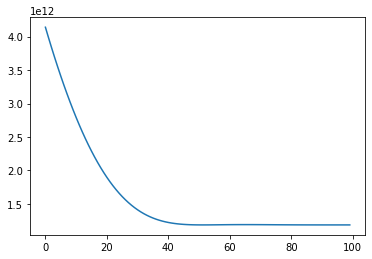

In [27]:
#train the model
num_epochs = 100
loss_values = []


for epoch in range(num_epochs):
    for X, y in train_dataloader:
        # zero the parameter gradients
        optimizer.zero_grad()
       
        # forward + backward + optimize
        pred = model(X)
        loss = loss_fn(pred, y.unsqueeze(-1))
        loss_values.append(loss.item())
        loss.backward()
        optimizer.step()


plt.plot(loss_values)
plt.show()

This is the loss function on the training data set for NCLH according to the different epochs

In [28]:


for X,y in test_dataloader:
    pred=model(X)
    loss = loss_fn(model(X), y.unsqueeze(-1))

print('MSE testing data set NCLH=',loss)

MSE testing data set NCLH= tensor(3.9109e+11, grad_fn=<MseLossBackward>)


<u><span style="font-size: 16pt">Architecture used </span></u>

I chose 2 months for the training data because the training of neural netwoks can be expensive and it was adviced to only take one or two months. For the testing data I chose a month to have 1/3 of the data set being a testing data set. 

I used the Adam for the optimization because it is the most used and converges quite quickly.

I chose 0,005 for the learning rate after few trials. I initially tried 0,01 but the loss stagnated quite quickly. 0,005 worked quite well and bellow it didn't make a real difference in term of loss, but the time was longer.

I chose the Mean Square Error loss function because this is the function we previously used and then we can compare the different methods.

I chose the hidden dimension equal to 5, which is quite small because I didn't want a complex Neural Network becasue it is time consuming and might overfit.

I chose a batch size of 64, honestly because that was the one from the example given, but as my training data has only 42 elements it is the same as having a batch size of 42.

I didn't "beat" the prior exercice but was similar to them.

<center><span style="font-size: 25pt">Question 5</span></center>

My idea is to take into account how a banking holiday change the trend of the stock volume by comparing it with the day before that is an ordinary day. Thus we compute the 1 day return of the volume. Then we expect it to be similar for the different banking holiday days and compute the mean of the return with the data we have at time n. Thus we predict our volume with banking holiday days and not ordinary days which supposedly will fit better.

In [29]:
AMZN_historical['return vol']=(AMZN_historical['Volume']-AMZN_historical['Volume'].shift(1))/AMZN_historical['Volume'].shift(1)

#Columbus Day: 12 october
#Veteran's Day: 11 november
#Friday after Thanksgiving: 27 november
#31st December 

date_banking_holiday = ['2016-10-10', '2016-11-11', '2016-11-25', '2017-10-09', '2017-11-10', '2017-11-24','2018-10-08', '2018-11-12', '2018-11-23',"2018-12-31","2019-10-14", "2019-11-11", "2019-11-29", "2019-12-31","2020-10-12", "2020-11-11", "2020-11-27"]
ret_vol_hol=AMZN_historical[['return vol','Volume','Volume day-1']].loc[date_banking_holiday]

In [30]:
#forecast of the return:
ret_vol_hol['pred return']=[0]*len(ret_vol_hol)
ret_vol_hol['pred return'].iloc[0]=ret_vol_hol['return vol'].iloc[0]
for i in range(1, len(ret_vol_hol)):
    mean_cumulative = ret_vol_hol['return vol'][:i].mean()
    ret_vol_hol['pred return'].iloc[i] = mean_cumulative
ret_vol_hol['pred vol']=(ret_vol_hol['pred return']+1)*ret_vol_hol['Volume day-1']

MSE=((ret_vol_hol['Volume']-ret_vol_hol['pred vol'])**2).mean()
MSE

<ipython-input-30-3eb1ae21e87b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ret_vol_hol['pred return'].iloc[0]=ret_vol_hol['return vol'].iloc[0]


1216926675282641.2

In [31]:
NCLH_historical['return vol']=(NCLH_historical['Volume']-NCLH_historical['Volume'].shift(1))/NCLH_historical['Volume'].shift(1)

#Columbus Day: 12 october
#Veteran's Day: 11 november
#Friday after Thanksgiving: 27 november
#31st December 

date_banking_holiday = ['2016-10-10', '2016-11-11', '2016-11-25', '2017-10-09', '2017-11-10', '2017-11-24','2018-10-08', '2018-11-12', '2018-11-23',"2018-12-31","2019-10-14", "2019-11-11", "2019-11-29", "2019-12-31","2020-10-12", "2020-11-11", "2020-11-27"]
ret_vol_hol=AMZN_historical[['return vol','Volume','Volume day-1']].loc[date_banking_holiday]


In [32]:
#forecast of the return:
ret_vol_hol['pred return']=[0]*len(ret_vol_hol)
ret_vol_hol['pred return'].iloc[0]=ret_vol_hol['return vol'].iloc[0]
for i in range(1, len(ret_vol_hol)):
    mean_cumulative = ret_vol_hol['return vol'][:i].mean()
    ret_vol_hol['pred return'].iloc[i] = mean_cumulative
ret_vol_hol['pred vol']=(ret_vol_hol['pred return']+1)*ret_vol_hol['Volume day-1']

MSE=((ret_vol_hol['Volume']-ret_vol_hol['pred vol'])**2).mean()
MSE

<ipython-input-32-3eb1ae21e87b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ret_vol_hol['pred return'].iloc[0]=ret_vol_hol['return vol'].iloc[0]


1216926675282641.2

The MSE seems a little better